In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
file_path='Housing.csv'
data=pd.read_csv(file_path)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()
data.describe()
data['mainroad']=data['mainroad'].map({'yes':1,'no':0})
data['guestroom']=data['guestroom'].map({'yes':1,'no':0})
data['basement']=data['basement'].map({'yes':1,'no':0})
data['hotwaterheating']=data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning']=data['airconditioning'].map({'yes':1,'no':0})
data['prefarea']=data['prefarea'].map({'yes':1,'no':0})
data=pd.get_dummies(data,columns=['furnishingstatus'],drop_first=True)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

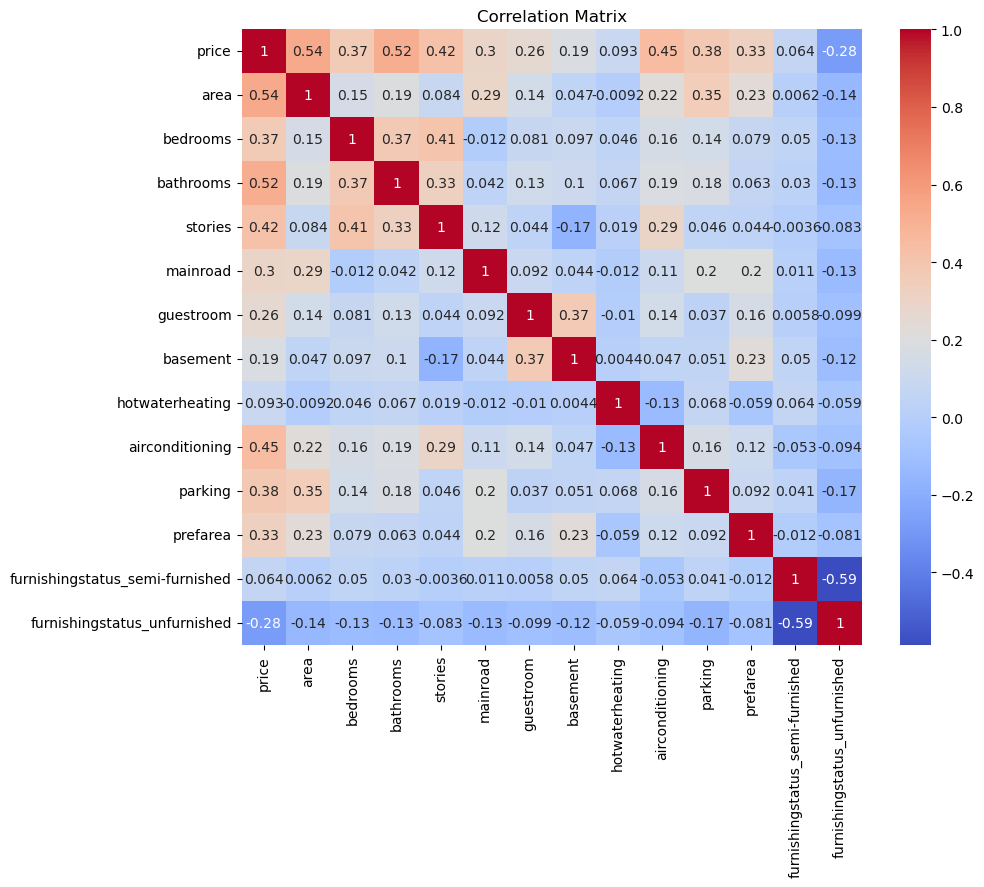

In [5]:
X=data.drop('price',axis=1)
Y=data['price']
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(436, 13) (109, 13) (436,) (109,)


In [7]:
model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print("Model Coefficients:",model.coef_)
print("Model Intercept : ",model.intercept_)

Model Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Model Intercept :  260032.35760741215


In [8]:
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print("Mean Squared Error (MSE): ",mse)
print("Root Mean Squared Error (RMSE): ",rmse)
print("R-squared (R2) Score:",r2)

Mean Squared Error (MSE):  1754318687330.6638
Root Mean Squared Error (RMSE):  1324506.9600914386
R-squared (R2) Score: 0.6529242642153184


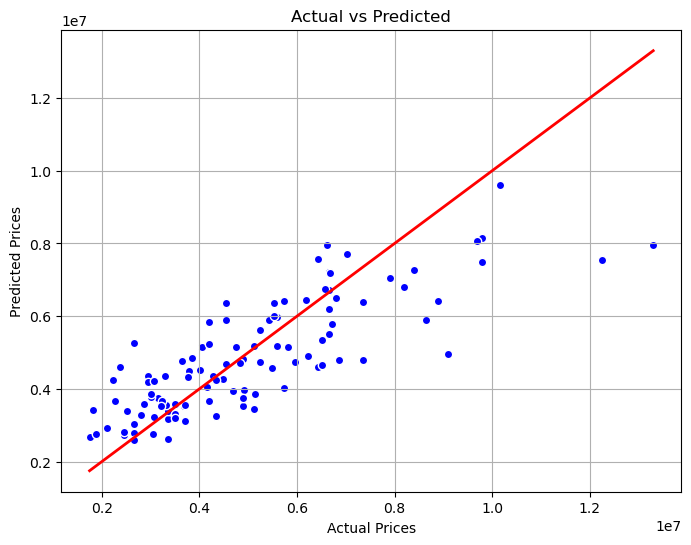

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test,Y_pred,color='blue',edgecolor='w')
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color="red",lw=2)
plt.title("Actual vs Predicted")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [10]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


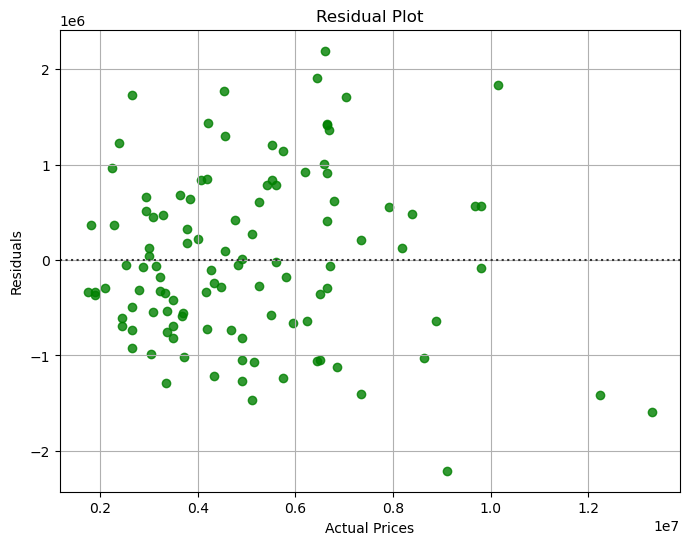

In [11]:
plt.figure(figsize=(8,6))
sns.residplot(x=Y_test,y=Y_pred,color="green",line_kws={'color':'red','lw':2})
plt.title('Residual Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_scores=cross_val_score(model,X,Y,cv=5,scoring='neg_mean_squared_error')
print("Cross validation MSE Scores",-cross_val_scores)
print('Average MSE from Cross-Validation:',-cross_val_scores.mean())

Cross validation MSE Scores [6.85881616e+12 9.52137928e+11 8.73716064e+11 8.68982894e+11
 1.04858231e+12]
Average MSE from Cross-Validation: 2120447069698.9966


In [14]:
from sklearn.linear_model import Ridge, Lasso
ridge=Ridge(alpha=1.0)
ridge.fit(X_train_scaled,Y_train)
ridge_pred=ridge.predict(X_test_scaled)

#Lasso regression
lasso=Lasso(alpha=0.01)
lasso.fit(X_train_scaled,Y_train)
lasso_pred=lasso.predict(X_test_scaled)

#Evaluate Ridge and Lasso 
ridge_rmse=np.sqrt(mean_squared_error(Y_test,ridge_pred))
lasso_rmse=np.sqrt(mean_squared_error(Y_test,lasso_pred))
print("Ridge RMSE ",ridge_rmse)
print("Lasso RMSE: ",lasso_rmse)


Ridge RMSE  1324703.4866138184
Lasso RMSE:  1324506.9650062919


In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
model_poly=LinearRegression()
model_poly.fit(X_train_poly,Y_train)
y_pred_poly=model_poly.predict(X_test_poly)
poly_rmse=np.sqrt(mean_squared_error(Y_test,y_pred_poly))
print("Polynomial Regression RMSE :",poly_rmse)

Polynomial Regression RMSE : 1384371.4734943088


In [16]:
from sklearn.model_selection import GridSearchCV
ridge_params={'alpha':[0.1,1,10,100]}
ridge_grid=GridSearchCV(Ridge(), ridge_params,cv=5,scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled,Y_train)
print("Best parameters for Ridge :",ridge_grid.best_params_)
print("Best cross-validation score for Ridge",-ridge_grid.best_score_)

Best parameters for Ridge : {'alpha': 10}
Best cross-validation score for Ridge 1059768849845.4545


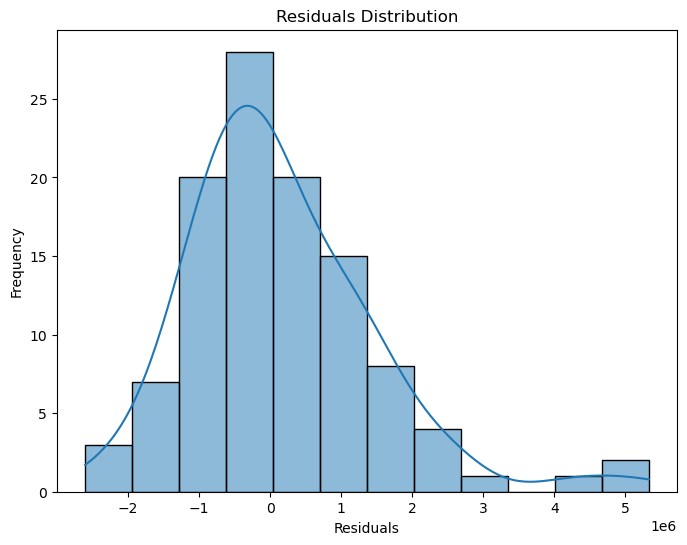

In [17]:
residuals=Y_test-Y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals,kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


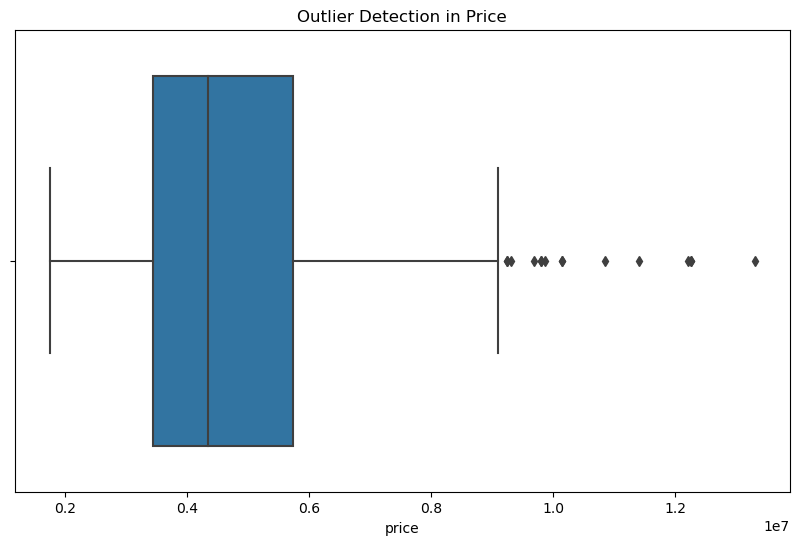

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data['price'])
plt.title('Outlier Detection in Price')
plt.show()

In [19]:
interaction=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_train_interaction=interaction.fit_transform(X_train)
X_test_interaction=interaction.transform(X_test)

model_interaction=LinearRegression()
model_interaction.fit(X_train_interaction,Y_train)
Y_pred_interaction=model_interaction.predict(X_test_interaction)
interaction_rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_interaction))
print("INteraction Model RMSE :",interaction_rmse)

INteraction Model RMSE : 1392991.5070590964


In [20]:
import joblib
joblib.dump(model,'house_price_model.pkl')
loaded_model=joblib.load('house_price_model.pkl')

In [21]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')


In [22]:
data.columns=data.columns.str.strip()

In [23]:
import pandas as pd
data=pd.read_csv("Housing.csv")

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


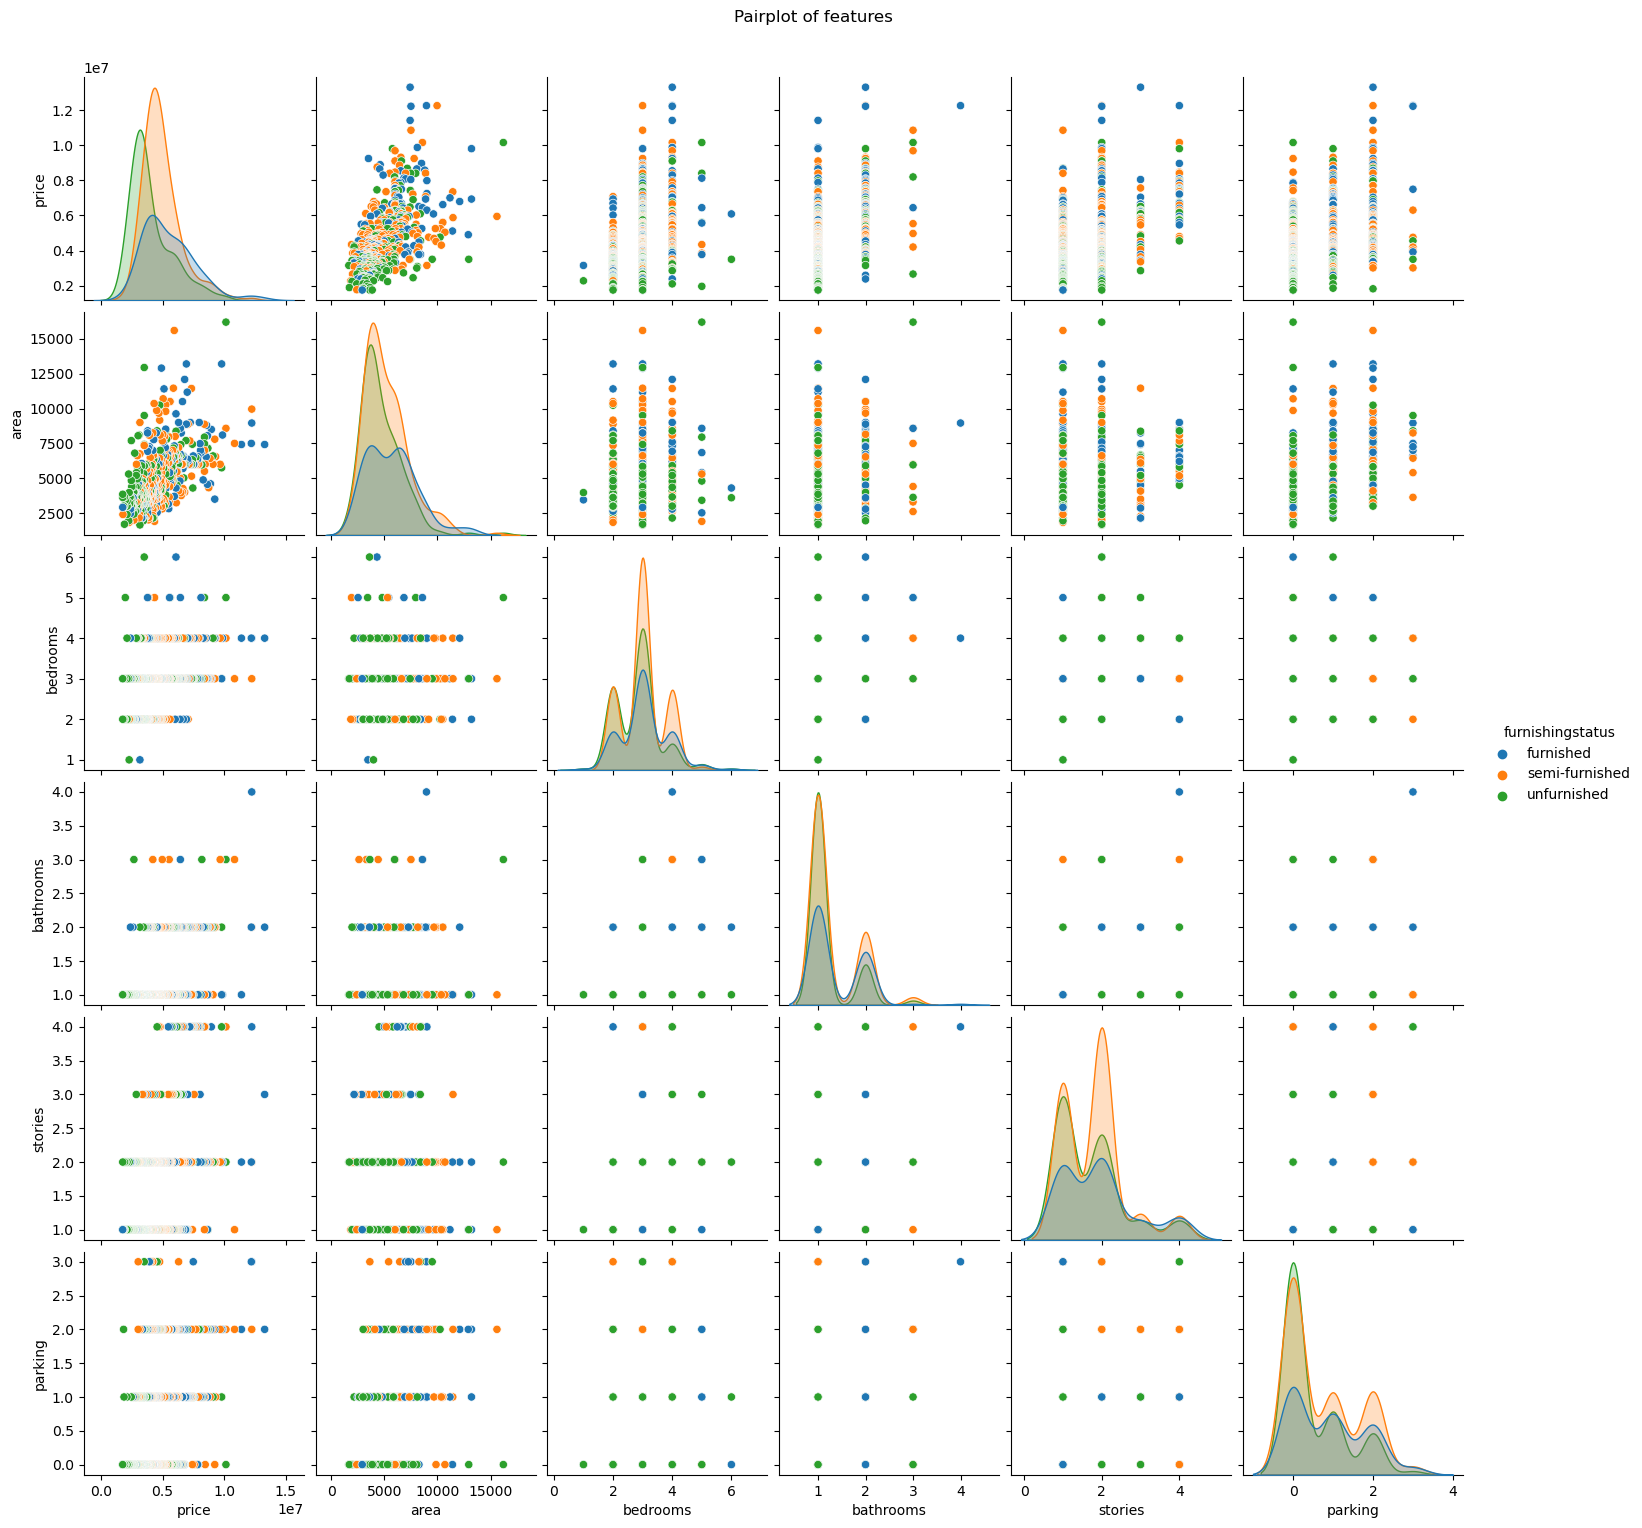

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data.columns)
sns.pairplot(data,diag_kind='kde',hue='furnishingstatus')
plt.suptitle('Pairplot of features',y=1.02)
plt.show()

In [25]:
print(data.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [26]:
data_encoded=pd.get_dummies(data,drop_first=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['furnishingstatus']=label_encoder.fit_transform(data['furnishingstatus'])

In [28]:
correlation_matrix=data_encoded.corr()

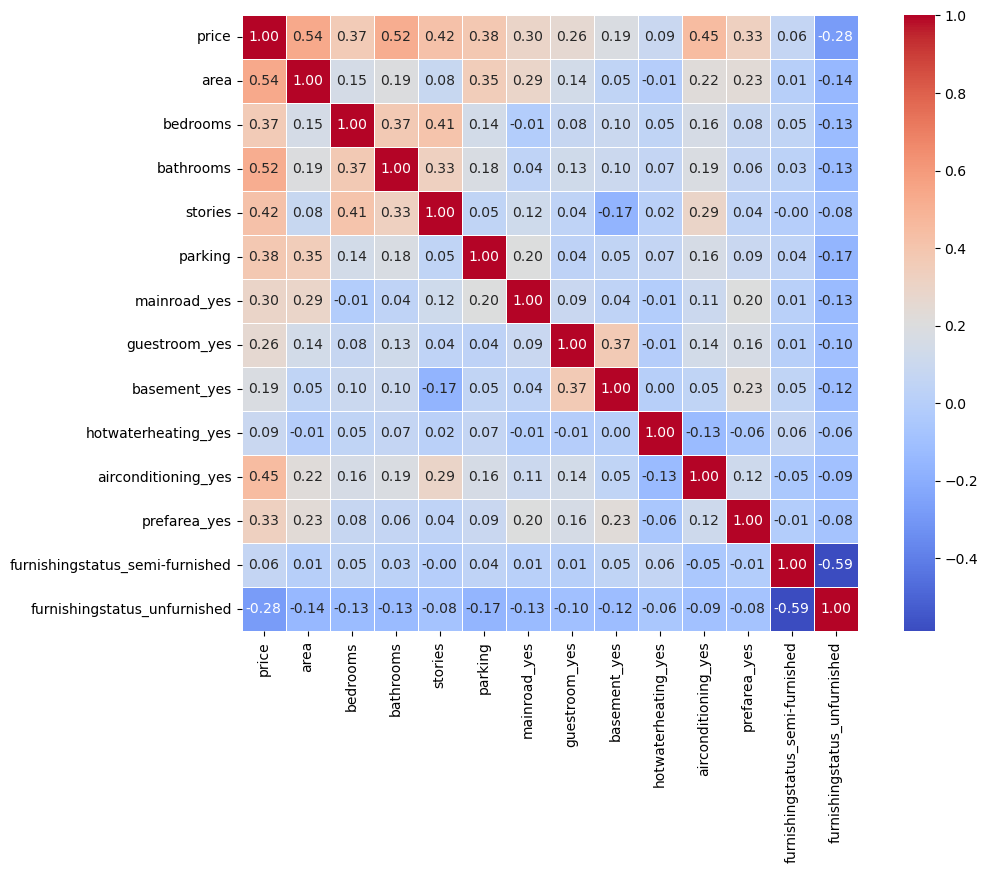

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',square=True,linewidth=.5)
plt.show()

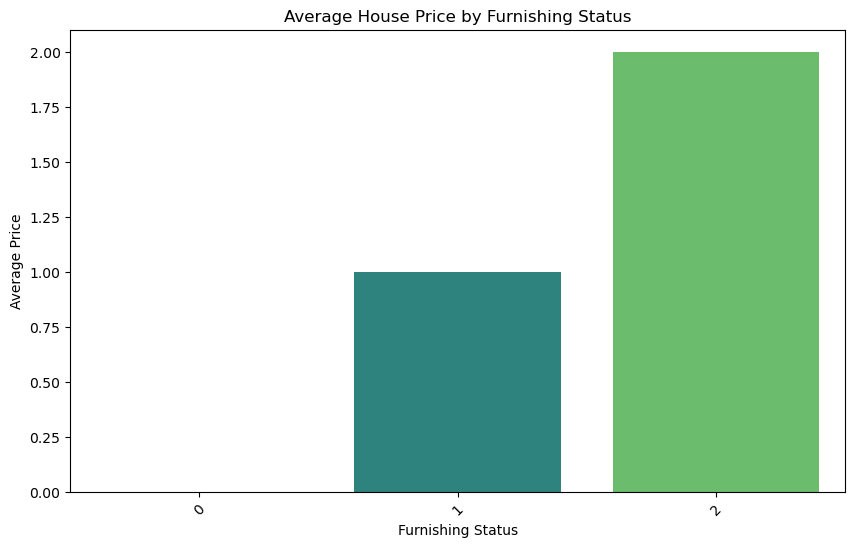

In [30]:
avg_price_furnishing=data.groupby('furnishingstatus')['price'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_furnishing.index,y=avg_price_furnishing.index,palette='viridis')
plt.title('Average House Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

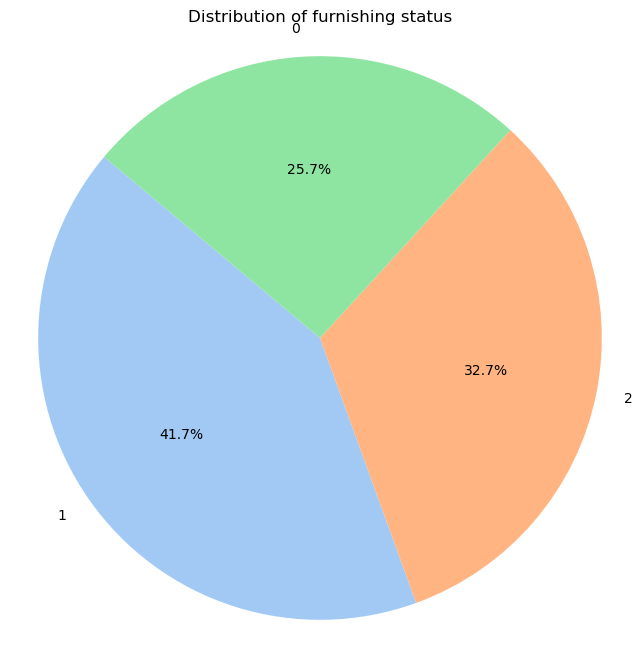

In [31]:
furnishing_counts=data['furnishingstatus'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(furnishing_counts,labels=furnishing_counts.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette("pastel"))
plt.title('Distribution of furnishing status')
plt.axis('equal')
plt.show()

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


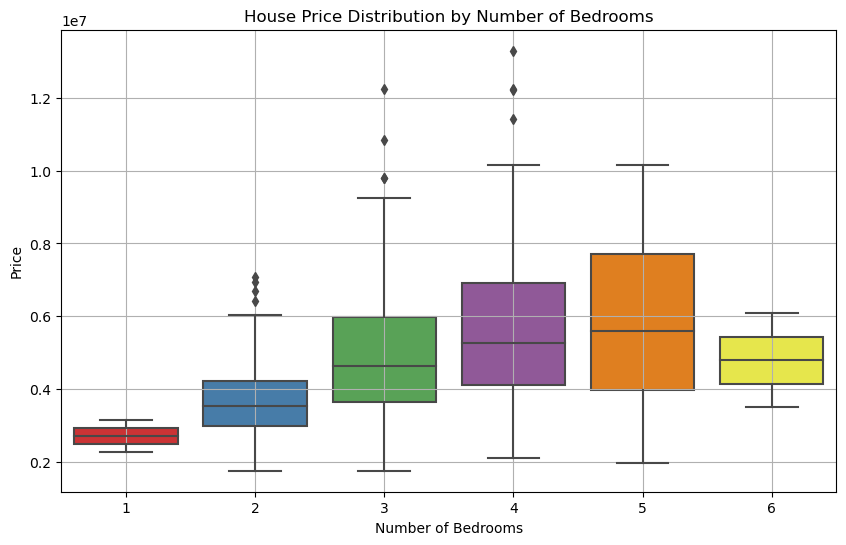

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data=pd.read_csv('Housing.csv')
print(data.head())
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=data,palette='Set1')
plt.title("House Price Distribution by Number of Bedrooms")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()


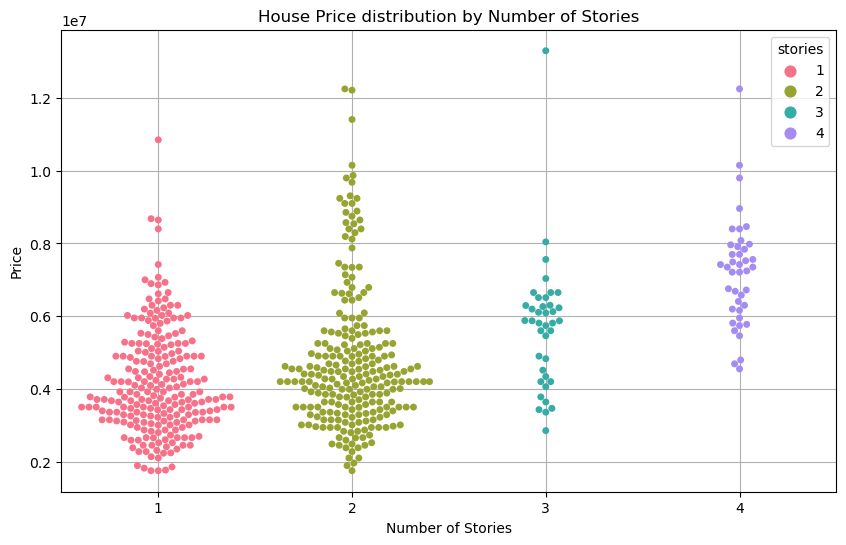

In [33]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='stories',y='price',data=data, hue='stories',palette='husl')
plt.title('House Price distribution by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.grid(True)
plt.show()

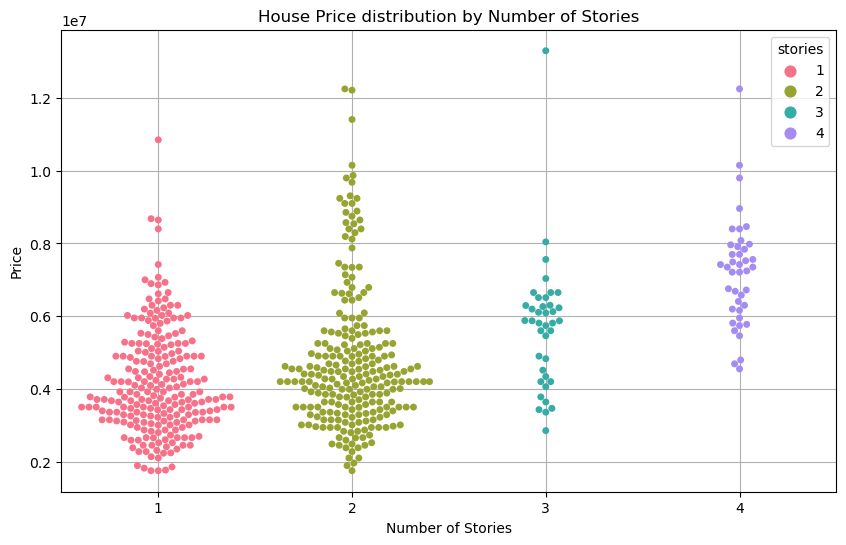

In [34]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='stories',y='price',data=data, hue='stories',palette='husl')
plt.title('House Price distribution by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.grid(True)
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


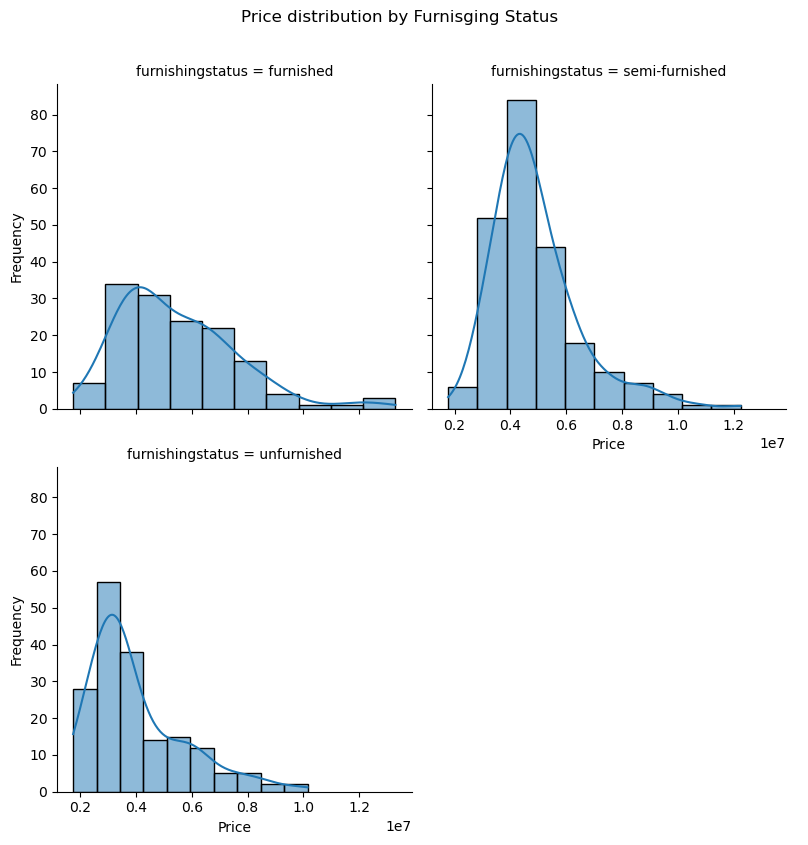

In [35]:
g=sns.FacetGrid(data, col='furnishingstatus',col_wrap=2,height=4)
g.map(sns.histplot,'price',kde=True,bins=10)
g.add_legend()
g.set_axis_labels('Price','Frequency')
g.fig.suptitle('Price distribution by Furnisging Status',y=1.05)
plt.show()

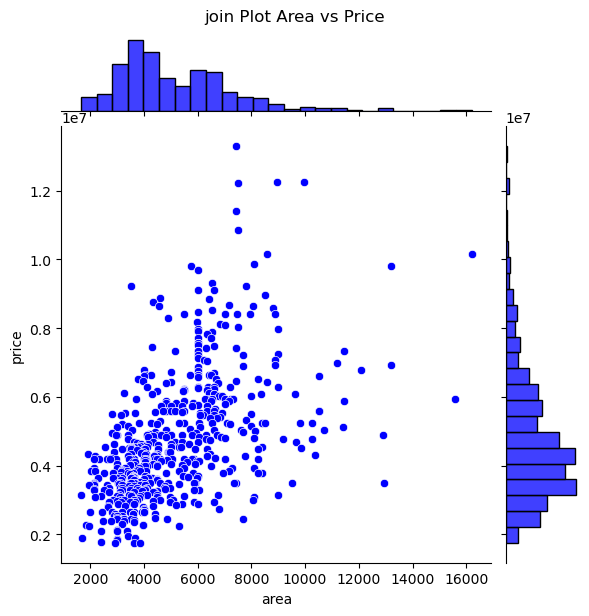

In [36]:
sns.jointplot(x='area',y='price',data=data, kind='scatter',color='blue',marginal_kws=dict(bins=25,fill=True))
plt.suptitle('join Plot Area vs Price',y=1.02)
plt.show()

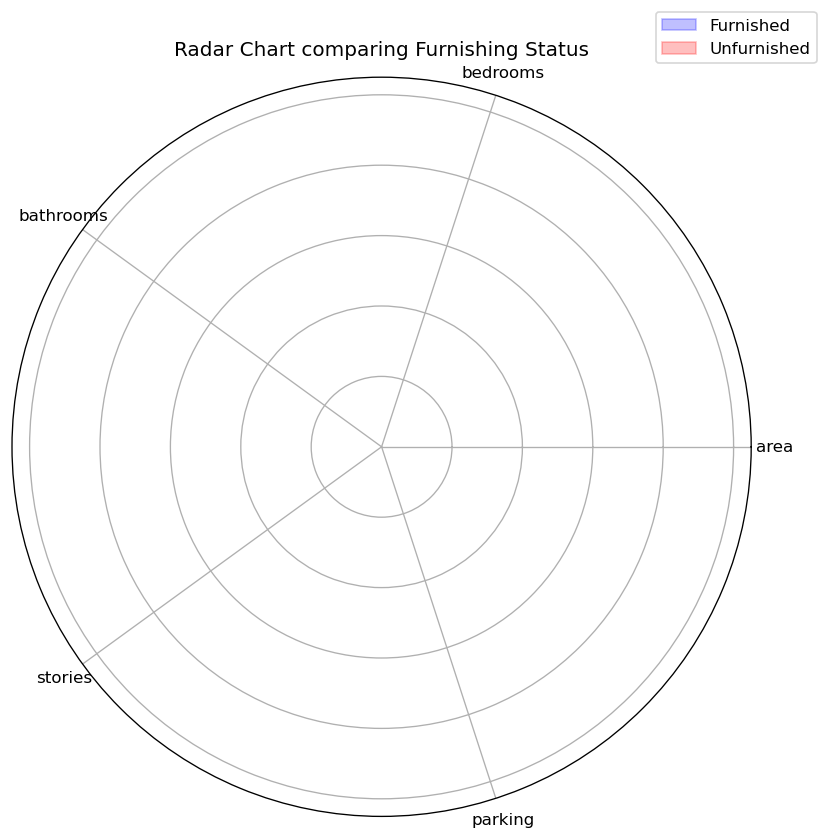

In [37]:
import numpy as np
labels=np.array(['area','bedrooms','bathrooms','stories','parking'])
furnishing_statuses=['Furnished','Unfurnished']
avg_values=[data[data['furnishingstatus']==status][labels].mean().values for status in furnishing_statuses]
angles=np.linspace(0,2*np.pi,len(labels),endpoint=False).tolist()
avg_values=np.array(avg_values)
avg_values=np.concatenate((avg_values,avg_values[:,[0]]),axis=1)
angles +=angles[:1]
plt.figure(figsize=(8,8),dpi=120)
ax=plt.subplot(111,polar=True)
ax.fill(angles,avg_values[0],color="blue",alpha=0.25)
ax.fill(angles,avg_values[1],color="red",alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart comparing Furnishing Status')
plt.legend(furnishing_statuses,loc='upper right',bbox_to_anchor=(1.1,1.1))
plt.show()